In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Assuming you have your data in a pandas DataFrame
# Replace 'your_data.csv' with your actual dataset
data = pd.read_csv('data_new.csv')

# Preprocessing: Convert to PyTorch tensors
# Assuming 'Creditability' is the target column
X = data.drop('Creditability', axis=1).values
y = data['Creditability'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the numpy arrays to PyTorch tensors
X_train = torch.FloatTensor(X_train).cuda()
X_test = torch.FloatTensor(X_test).cuda()
y_train = torch.FloatTensor(y_train).view(-1, 1).cuda()  # Assuming it's a column vector
y_test = torch.FloatTensor(y_test).view(-1, 1).cuda()

print(torch.cuda.is_available())

# Define the MLP architecture
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sig = nn.Sigmoid()
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sig(out)
        return out

# Initialize the model
input_size = X.shape[1]  # Number of features
hidden_size = 16  # Number of neurons in the hidden layer (you can change this)
output_size = 1  # Binary output
model = MLP(input_size, hidden_size, output_size).cuda()

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Create data loaders
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=256, shuffle=True)

# Training the model
num_epochs = 200
train_losses = []
test_losses = []
accuracies = []
f1_scores = []

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    # Calculate test loss and accuracy
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_outputs = (test_outputs > 0.5).float()  # Convert to binary (0 or 1)
        accuracy = (test_outputs == y_test).float().mean()
    
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)
    test_losses.append(test_loss.item())
    accuracies.append(accuracy.item())
    # Calculate F1-score
    # f1 = f1_score(y_test.cpu().numpy(), test_outputs.cpu().numpy())
    # f1_scores.append(f1)
    
    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss}, Test Loss: {test_loss.item()}, Test Accuracy: {accuracy.item()}')


True
Epoch [1/200], Train Loss: 62.19712086727745, Test Loss: 61.98704528808594, Test Accuracy: 0.29375001788139343
Epoch [11/200], Train Loss: 0.6910729314151564, Test Loss: 0.6825425624847412, Test Accuracy: 0.7129166722297668
Epoch [21/200], Train Loss: 0.6203996492059607, Test Loss: 0.6187369227409363, Test Accuracy: 0.7208333611488342
Epoch [31/200], Train Loss: 0.5992227479031211, Test Loss: 0.6023882031440735, Test Accuracy: 0.71875
Epoch [41/200], Train Loss: 0.5855880379676819, Test Loss: 0.5842519998550415, Test Accuracy: 0.7066667079925537
Epoch [51/200], Train Loss: 0.5736121629413805, Test Loss: 0.5708505511283875, Test Accuracy: 0.7208333611488342
Epoch [61/200], Train Loss: 0.5635050378347698, Test Loss: 0.5630801320075989, Test Accuracy: 0.7258333563804626
Epoch [71/200], Train Loss: 0.5529713897328628, Test Loss: 0.5507322549819946, Test Accuracy: 0.7316666841506958
Epoch [81/200], Train Loss: 0.5466033204605705, Test Loss: 0.5425689220428467, Test Accuracy: 0.73541671

In [58]:
# Define the file path where you want to save the model
file_path = 'mlp.pt'

# Save the model to the specified file
torch.save(model.state_dict(), file_path)

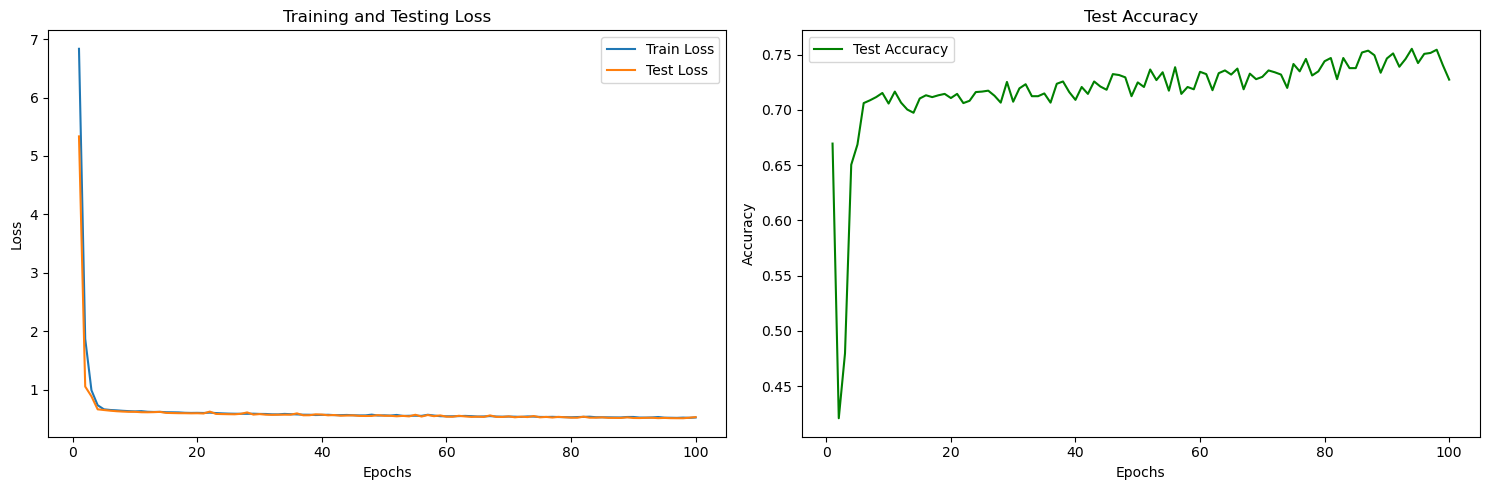

In [53]:

# Plotting train and test loss and F1 score
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()

# plt.subplot(1, 3, 2)
# plt.plot(range(1, num_epochs+1), f1_scores, label='F1 Score', color='orange')
# plt.xlabel('Epochs')
# plt.ylabel('F1 Score')
# plt.title('F1 Score')
# plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [62]:
creditability_counts[1] / (creditability_counts[0] + creditability_counts[1])

0.7019166666666666

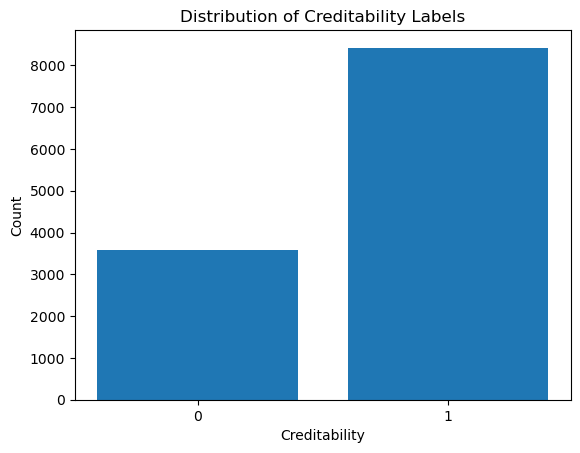

In [54]:
# Assuming you have your data in a pandas DataFrame
# Replace 'your_data.csv' with your actual dataset
data = pd.read_csv('data_new.csv')

# Assuming 'Creditability' is the target column
creditability_counts = data['Creditability'].value_counts()

plt.bar(creditability_counts.index, creditability_counts.values)
plt.xlabel('Creditability')
plt.ylabel('Count')
plt.title('Distribution of Creditability Labels')
plt.xticks(creditability_counts.index)  # Assuming labels are binary (0 and 1)
plt.show()